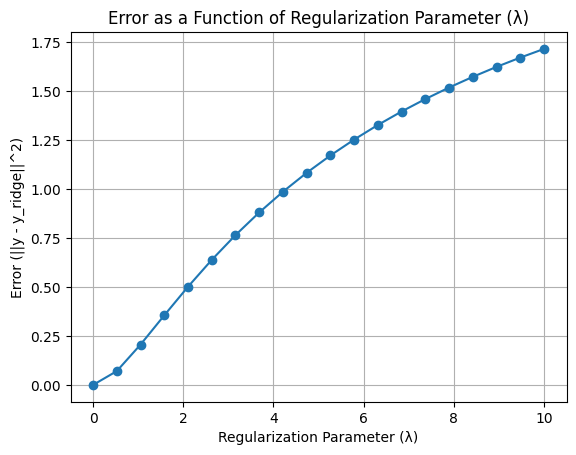

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Given data (same as before)
X = np.array([
    [1, np.cos(2 * np.pi * 0.115), np.sin(2 * np.pi * 0.115)],
    [1, np.cos(2 * np.pi * 0.116), np.sin(2 * np.pi * 0.116)],
    [1, np.cos(2 * np.pi * 0.625), np.sin(2 * np.pi * 0.625)]
])

y = np.array([-1, -1, 1])

# X^T X and X^T y
X_T_X = np.dot(X.T, X)
X_T_y = np.dot(X.T, y)

# Regularization parameter values (20 values from 0 to 10)
lambda_values = np.linspace(0, 10, 20)

# Array to store the error for each lambda
errors = []

# Compute the error for each lambda
for lambda_reg in lambda_values:
    I = np.eye(X_T_X.shape[0])
    
    # Ridge regression coefficients
    theta_ridge = np.linalg.solve(X_T_X + lambda_reg * I, X_T_y)
    
    # Predicted y using ridge regression
    y_ridge = np.dot(X, theta_ridge)
    
    # Compute the squared error
    error = np.sum((y_ridge - y) ** 2)
    
    # Append the error to the list
    errors.append(error)

# Plot the error as a function of lambda
plt.plot(lambda_values, errors, marker='o')
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('Error (||y - y_ridge||^2)')
plt.title('Error as a Function of Regularization Parameter (λ)')
plt.grid(True)
plt.show()


In [5]:
import numpy as np

# Given data (same as before)
X = np.array([
    [1, np.cos(2 * np.pi * 0.115), np.sin(2 * np.pi * 0.115)],
    [1, np.cos(2 * np.pi * 0.116), np.sin(2 * np.pi * 0.116)],
    [1, np.cos(2 * np.pi * 0.625), np.sin(2 * np.pi * 0.625)]
])

y = np.array([-1, -1, 1])

# Number of noisy instances
num_instances = 10

# Standard deviation of noise
noise_std = 0.5

# List to store the errors for each instance
errors = []

# Repeat for each noisy instance
for _ in range(num_instances):
    # Add random noise to the measurements
    noise = np.random.normal(0, noise_std, size=y.shape)
    y_noisy = y + noise
    
    # Compute the least-squares coefficients for the noisy data
    theta_LS_noisy = np.linalg.solve(X.T @ X, X.T @ y_noisy)
    
    # Compute the predicted y using the least-squares coefficients
    y_LS_noisy = X @ theta_LS_noisy
    
    # Compute the squared error between the noisy prediction and the true y
    error = np.sum((y_LS_noisy - y) ** 2)
    
    # Append the error to the list
    errors.append(error)

# Compute the average error across all instances
avg_error = np.mean(errors)

# Print the average error
print(f"Average error (squared difference): {avg_error}")

Average error (squared difference): 0.5816002065975852


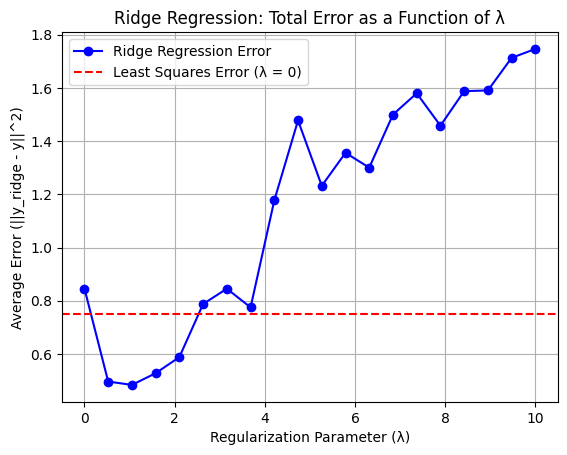

Average Errors for Ridge Regression (for each lambda):
[np.float64(0.8458616577464462), np.float64(0.49626259856347044), np.float64(0.48351746852128397), np.float64(0.5275223553742584), np.float64(0.5880363355880449), np.float64(0.7876317532219888), np.float64(0.845176946807749), np.float64(0.774910833353609), np.float64(1.1770655337577551), np.float64(1.477550833273099), np.float64(1.2318395989289948), np.float64(1.355878954874832), np.float64(1.300154377866905), np.float64(1.4996032395185916), np.float64(1.579692790615258), np.float64(1.4577811527245799), np.float64(1.5876552825883903), np.float64(1.5903567819145343), np.float64(1.7127953892577543), np.float64(1.746371160031283)]
Average Error for Least Squares (λ = 0): 0.7509138378494087


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Given data (same as before)
X = np.array([
    [1, np.cos(2 * np.pi * 0.115), np.sin(2 * np.pi * 0.115)],
    [1, np.cos(2 * np.pi * 0.116), np.sin(2 * np.pi * 0.116)],
    [1, np.cos(2 * np.pi * 0.625), np.sin(2 * np.pi * 0.625)]
])

y = np.array([-1, -1, 1])

# Number of noisy instances
num_instances = 10

# Standard deviation of noise
noise_std = 0.5

# Regularization parameters (20 values from 0 to 10)
lambda_values = np.linspace(0, 10, 20)

# List to store the average errors for each lambda (Ridge Regression)
avg_ridge_errors = []

# Compute the least-squares coefficients for the noiseless data
theta_LS = np.linalg.solve(X.T @ X, X.T @ y)

# Repeat for each noisy instance
for lambda_reg in lambda_values:
    errors_ridge = []
    errors_ls = []
    
    # For each noisy instance
    for _ in range(num_instances):
        # Add random noise to the measurements
        noise = np.random.normal(0, noise_std, size=y.shape)
        y_noisy = y + noise
        
        # Compute Ridge Regression coefficients for the noisy data
        I = np.eye(X.shape[1])
        theta_ridge = np.linalg.solve(X.T @ X + lambda_reg * I, X.T @ y_noisy)
        
        # Compute the predicted y using the ridge regression coefficients
        y_ridge = X @ theta_ridge
        
        # Compute the squared error between the noisy prediction and the true y (Ridge)
        error_ridge = np.sum((y_ridge - y) ** 2)
        errors_ridge.append(error_ridge)
        
        # Compute the least-squares coefficients for the noisy data
        theta_LS_noisy = np.linalg.solve(X.T @ X, X.T @ y_noisy)
        
        # Compute the predicted y using the noisy least-squares coefficients
        y_ls = X @ theta_LS_noisy
        
        # Compute the squared error between the noisy prediction and the true y (Least Squares)
        error_ls = np.sum((y_ls - y) ** 2)
        errors_ls.append(error_ls)
    
    # Average the errors across all noisy instances for this lambda (Ridge)
    avg_ridge_errors.append(np.mean(errors_ridge))
    
    # Average the errors across all noisy instances for this lambda (LS)
    avg_ls_error = np.mean(errors_ls)

# Plot the total error as a function of regularization parameter (lambda)
plt.plot(lambda_values, avg_ridge_errors, label='Ridge Regression Error', marker='o', color='b')
plt.axhline(avg_ls_error, color='r', linestyle='--', label='Least Squares Error (λ = 0)')

plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('Average Error (||y_ridge - y||^2)')
plt.title('Ridge Regression: Total Error as a Function of λ')
plt.legend()
plt.grid(True)
plt.show()

# Output the average errors for reference
print("Average Errors for Ridge Regression (for each lambda):")
print(avg_ridge_errors)
print(f"Average Error for Least Squares (λ = 0): {avg_ls_error}")
